# Data Analysis Using Graphical Displays

In [126]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

In [127]:
sns.set(color_codes=True)
output_notebook()

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

Loading BokehJS ...

# Malignant melanoma in the United States

### Data format

* `state`
* `mortality` number of white males died due to malignant melanoma 1950-1969 per one million inhabitants.
* `latitude` latitude of the geographic centre of the state.
* `longitude` longitude of the geographic centre of each state.
* `ocean` a binary variable indicating contiguity to an ocean at levels `no` or `yes`.

In [128]:
melanoma = pd.read_csv('USmelanoma.csv')
melanoma.rename(index=str, columns={'Unnamed: 0': 'state'}, inplace=True)
melanoma.head()

,state,mortality,latitude,longitude,ocean
0,Alabama,219,33.0,87.0,yes
1,Arizona,160,34.5,112.0,no
2,Arkansas,170,35.0,92.5,no
3,California,182,37.5,119.5,yes
4,Colorado,149,39.0,105.5,no


In [129]:
xrn = (melanoma['mortality'].min() * 0.9, melanoma['mortality'].max() * 1.1)

(77.400000000000006, 251.90000000000003)

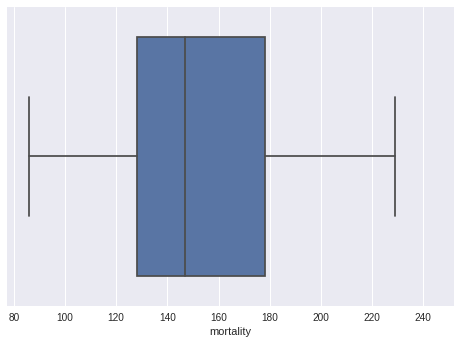

In [130]:
sns.boxplot(x="mortality", data=melanoma)
sns.plt.xlim(*xrn)

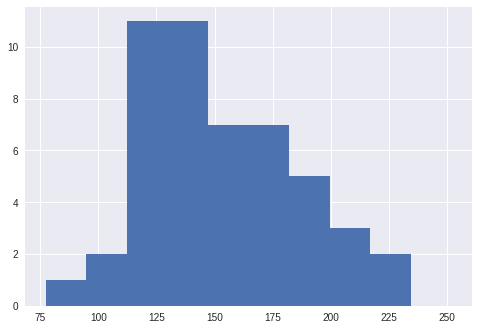

In [131]:
melanoma['mortality'].hist(range=xrn)

_Both the histogram and the boxplot indicate a certain skewness of the mortality distribution. Looking at the characteristics of all mortality rates is a useful beginning, but fo these data we might be more interested in comparing mortality rates for ocean and non-ocean states._

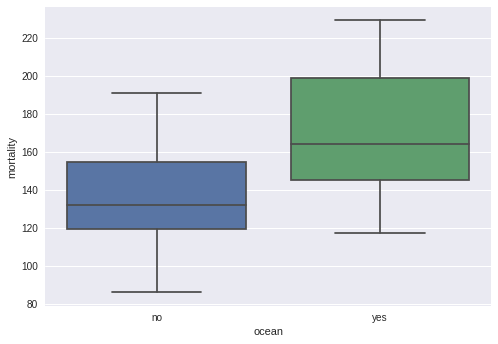

In [132]:
sns.boxplot(x="ocean", y="mortality", data=melanoma, order=["no", "yes"])

_Above graph leads to the impression that the mortality is increased in east or west coast states compared to the rest of the country._

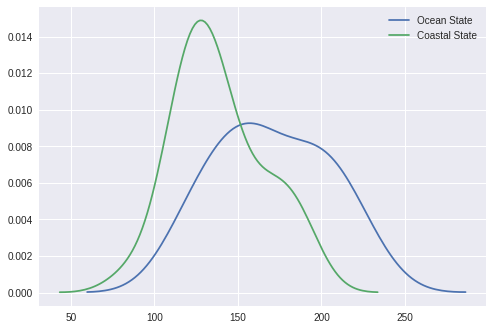

In [133]:
fig, ax = plt.subplots()
sns.kdeplot(data=melanoma[melanoma['ocean'] == 'yes']['mortality'], ax=ax, legend=True)
sns.kdeplot(data=melanoma[melanoma['ocean'] == 'no']['mortality'], ax=ax)

ax.legend(["Ocean State", "Coastal State"])

_An alternative to boxplots is to formally estimate the density function of a variable and then plot the resulting estimate. The result above supports the impression from previous boxplots._

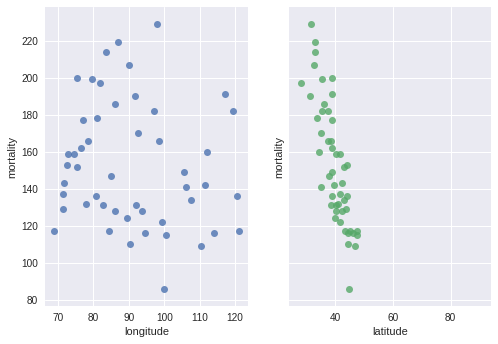

In [134]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x="longitude", y="mortality", data=melanoma, ax=ax1, fit_reg=False)
sns.regplot(x="latitude", y="mortality", data=melanoma, ax=ax2, fit_reg=False)

_Mortality is clearly related only to latitude, so we can now produce scatterplots of mortality rate against latitude separately for ocean and non-ocean states._

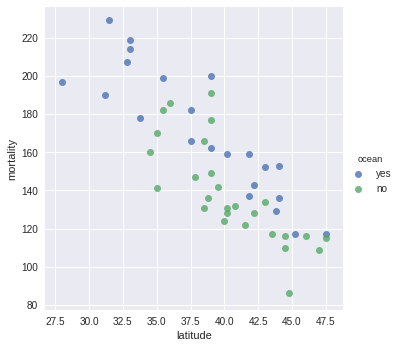

In [135]:
sns.lmplot(x="latitude", y="mortality", hue="ocean", data=melanoma, fit_reg=False)

_Plot above highlights that the mortality is lowest in the northern land states. Coastal states show a higher mortality than land states at roughly the same latitude._

In [136]:
from bokeh.sampledata import us_states
us_states = us_states.data.copy()
del us_states["HI"]
del us_states["AK"]

max_mortality = melanoma['mortality'].max()
colors = list(reversed(sns.color_palette("Blues_d", 10).as_hex()))
state_colors = []
mortality = {}
for _, row in melanoma.iterrows():
    try:
        mortality[us_state_abbrev[row['state']]] = row['mortality']
    except KeyError:
        pass

# NOTE: Order here is improtant, hence looping through us_states.
for state in us_states:
    try:
        m = mortality[state]
        idx = min(int((m / max_mortality) * 9), 9)
        state_colors.append(colors[idx])
    except KeyError:
        state_colors.append("black")

p = figure(title="Malignant melanoma mortality rates in US", plot_width=800, plot_height=700, toolbar_location="left")
p.patches(
    [us_states[code]['lons'] for code in us_states], 
    [us_states[code]['lats'] for code in us_states],
    fill_alpha=0.9,
    fill_color=state_colors,
    line_color="#884444",
    line_width=0.5)

show(p)

W-1005 (SNAPPED_TOOLBAR_ANNOTATIONS): Snapped toolbars and annotations on the same side MAY overlap visually: Figure(id='b09fecaf-ef59-4d3f-a704-27f84d4fd9e7', ...)


## Summary of Findings

_Mortality is related only to the latitude of a state not to its longitude, mortality is higher for costal states than for land states, and the highest mortality is observed in the south costal states with latitude less than 32 degrees._

# Chinese Health and Family Life

## Data Format

* `R_edu` level of education of the responding woman
* `R_income` monthly income (in yuan) of the responding woman
* `R_health` health status of the responding woman in the last year
* `R_happy` how happy was the responding woman in the last year
* `A_edu` level of education of the woman's partner
* `A_income` monthly income (in yuan) of the woman's partner

In [137]:
chfls = pd.read_csv('CHFLS.csv')
chfls.head()

,Unnamed: 0,R_region,R_age,R_edu,R_income,R_health,R_height,R_happy,A_height,A_edu,A_income
0,2,Northeast,54,Senior high school,900,Good,165,Somewhat happy,172,Senior high school,500
1,3,Northeast,46,Senior high school,500,Fair,156,Somewhat happy,170,Senior high school,800
2,10,Northeast,48,Senior high school,800,Good,163,Somewhat happy,172,Junior high school,700
3,11,Northeast,46,Junior high school,300,Fair,164,Somewhat happy,174,Elementary school,700
4,22,Northeast,45,Junior high school,300,Fair,162,Somewhat happy,172,Junior high school,400


In [138]:
chfls.shape

(1534, 11)

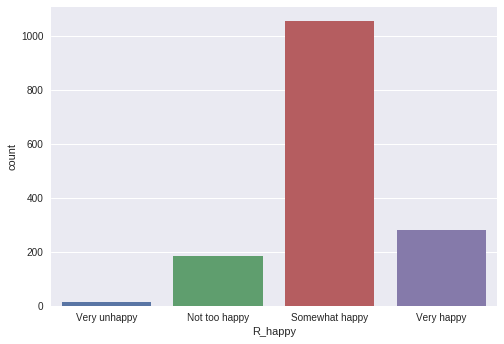

In [139]:
sns.countplot(x="R_happy", data=chfls, order=["Very unhappy", "Not too happy", "Somewhat happy", "Very happy"])

In [140]:
health_happy = pd.crosstab(chfls['R_health'], chfls['R_happy']).apply(lambda row: row/row.sum(), axis=1)
health_happy = health_happy.reindex_axis(['Very unhappy', 'Not too happy', 'Somewhat happy', 'Very happy'], axis=1)
health_happy

R_happy,Very unhappy,Not too happy,Somewhat happy,Very happy
R_health,,,,
Excellent,0.000000,0.076023,0.485380,0.438596
Fair,0.008677,0.145336,0.759219,0.086768
Good,0.001718,0.072165,0.788660,0.137457
Not good,0.050360,0.330935,0.553957,0.064748
Poor,0.200000,0.400000,0.300000,0.100000


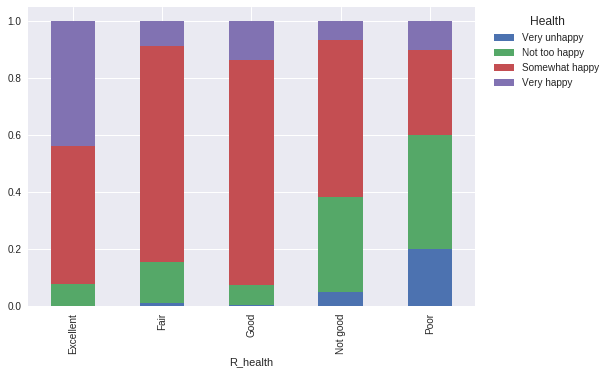

In [141]:
health_happy.plot.bar(stacked=True)
plt.legend(title='Health', loc='upper right', bbox_to_anchor=(1.3, 1))

In [142]:
happy_log_income = pd.crosstab(np.log(chfls['R_income'] + 1), chfls['R_happy']).apply(lambda row: row/row.sum(), axis=1)
happy_log_income = happy_log_income.reindex_axis(['Very unhappy', 'Not too happy', 'Somewhat happy', 'Very happy'], axis=1)
happy_log_income.head()

R_happy,Very unhappy,Not too happy,Somewhat happy,Very happy
R_income,,,,
0.000000,0.014815,0.200000,0.607407,0.177778
2.397895,0.000000,0.750000,0.000000,0.250000
3.044522,0.000000,0.000000,1.000000,0.000000
3.433987,0.000000,0.111111,0.888889,0.000000
3.713572,0.000000,0.076923,0.846154,0.076923


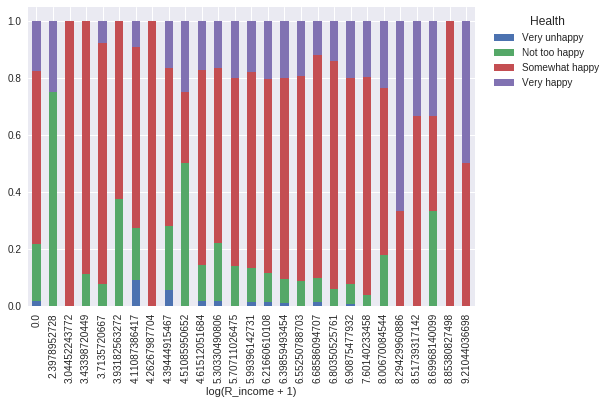

In [143]:
ax = happy_log_income.plot.bar(stacked=True)
ax.legend(title='Health', loc='upper right', bbox_to_anchor=(1.3, 1))
ax.set_xlabel("log(R_income + 1)")

_For happines depending on log-income (since income is naturally skewed we use a log-transformation of the income) it seems that the proportion of unhappy and not too happy women decreases with increasing income whereas the proportion of very happy women stays rather constant._

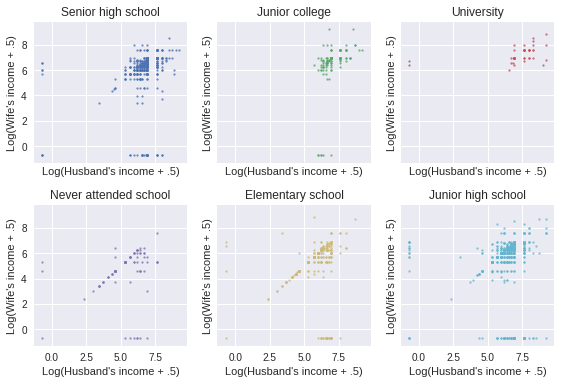

In [144]:
chfls['R_income_log'] = np.log(chfls['R_income'] + 0.5)
chfls['A_income_log'] = np.log(chfls['A_income'] + 0.5)
fig, ax = plt.subplots(ncols=3, nrows=2, sharey=True, sharex=True)

names = ['Senior high school', 'Junior college', 'University', 'Never attended school', 'Elementary school', 'Junior high school']

for idx, name in enumerate(names):
    row, col = divmod(idx, 3)
    sns.regplot(
        x='A_income_log', 
        y='R_income_log', 
        data=chfls[chfls['R_edu'] == name], 
        ax=ax[row][col],
        fit_reg=False,
        scatter_kws={'s':5}
    ).set_title(name)
    ax[row][col].set_xlabel("Log(Husband's income + .5)")
    ax[row][col].set_ylabel("Log(Wife's income + .5)")
    
plt.tight_layout()

_Some observations are positioned on a straight line with slope one, most probably an artifact of missing value imputation by linear models._

_Four constellations can be identified: both partners have zero income, the partner has no income, the woman has no income or both partners have a positive income._

_For coupes where the woman has a university degree, the income of both partners is relatively high (except for two couples where only the woman has income)._

_A small number of former junior college students live in relationships where only the man has income, the income of both partners seems only slightly positively correlated for the remaining couples._

_For lower levels of education, all four constellations are present._

_The frequency of couples where only the man has some income seems larger than the other way around._

_Ignoring the observations on the straight line, there is almost no association between the income of both partners._

## Summary of Findings

_Happiness depends on health status. Women reported to be very happy more often when they also reported a good or excellent health status. The dependency of happiness on the income of the women seems to be less clear, but we conclude that, conditional on education, the income of wives and their husbands is highly correlated._

# Ex. 2.1 Household

The aim of the survey was to investigate how the division of household expenditure between the four commodity groups depends on total expenditure and to find out whether this relationship differs for men and women. Use appropriate graphical methods to answer these questions and state your conclusions.

## Data format

* `housing` housing, including fuel and light
* `food` foodstuffs, including alcohol and tobacco
* `goods` other goods, including clothing, footwear, and durable goods
* `service` services, including transport and vehicles
* `gender` respondent gender.

In [145]:
household = pd.read_csv('household.csv')
del household['Unnamed: 0']
household['total'] = household['housing'] + household['food'] + household['goods'] + household['service']
household

,housing,food,goods,service,gender,total
0,820,114,183,154,female,1271
1,184,74,6,20,female,284
2,921,66,1686,455,female,3128
3,488,80,103,115,female,786
4,721,83,176,104,female,1084
5,614,55,441,193,female,1303
6,801,56,357,214,female,1428
7,396,59,61,80,female,596
8,864,65,1618,352,female,2899
9,845,64,1935,414,female,3258


In [146]:
household.describe()

,housing,food,goods,service,total
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,828.375000,435.200000,873.700000,460.575000,2597.850000
std,462.219933,401.249536,1368.528654,531.557165,2389.281359
min,184.000000,47.000000,6.000000,20.000000,284.000000
25%,493.250000,76.250000,127.750000,139.000000,955.500000
50%,768.000000,268.000000,294.500000,262.000000,1649.000000
75%,1033.500000,768.250000,948.250000,452.750000,3142.500000
max,1981.000000,1308.000000,6471.000000,2063.000000,10615.000000


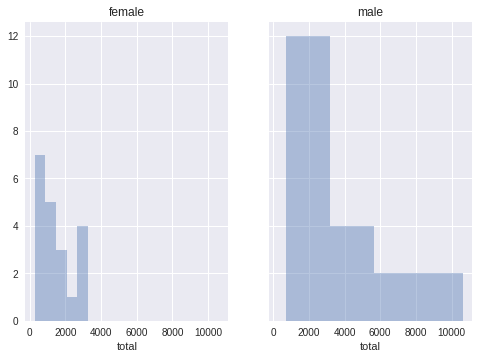

In [147]:
fib, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.distplot(household[household['gender'] == 'female']['total'], ax=ax1, kde=False).set_title('female')
sns.distplot(household[household['gender'] == 'male']['total'], ax=ax2, kde=False).set_title('male')

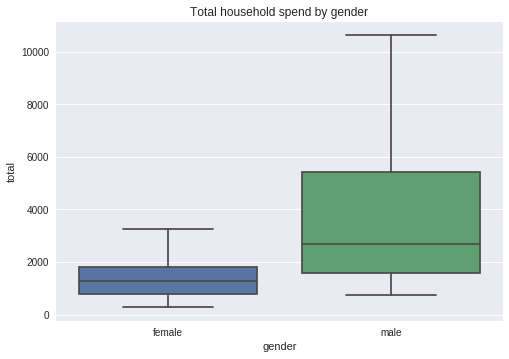

In [148]:
sns.boxplot(x='gender', y='total', data=household).set_title("Total household spend by gender")

IQR male spend range is between 2x to 3x more than IQR women.

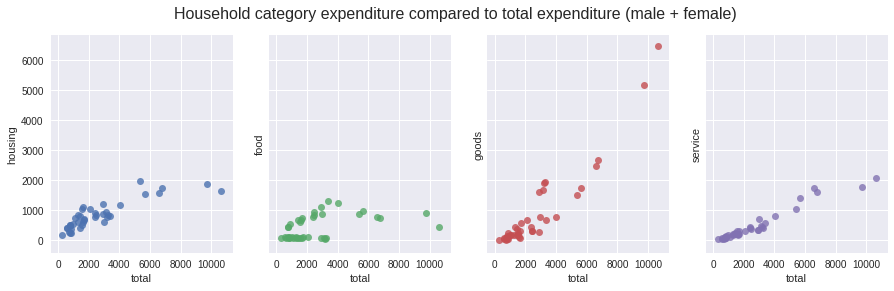

In [149]:
fig, ax = plt.subplots(ncols=4, sharey=True, sharex=True, figsize=(15, 4))
names = ['housing', 'food', 'goods', 'service']

for idx, name in enumerate(names):
    sns.regplot(x='total', y=name, data=household, fit_reg=False, ax=ax[idx])
    
fig.suptitle("Household category expenditure compared to total expenditure (male + female)", fontsize=16)

### Housing (Male + Female)

Most housing expenditure is localized in a cluster below 1200 for households totalling less than 4000. After that it peaks at about 2000 and stays about constant.

### Food (Male + Female)

There are clearly two distinct groups for households up to total of 4000. First group spends very little on food, and second one spends visibly more. The second group also plateau's at about 1000 for all total spends above 3000.

### Goods (Male + Female)

Spending on goods increases with the total expenditure, however most of the goods are clustered below 1000 per month and only few respondents then spend proportionally to their total.

### Service (Male + Female)

Again most of the service expenditure is clustered below 1000 per month, but people with higher total expenditure spend proportionally more.


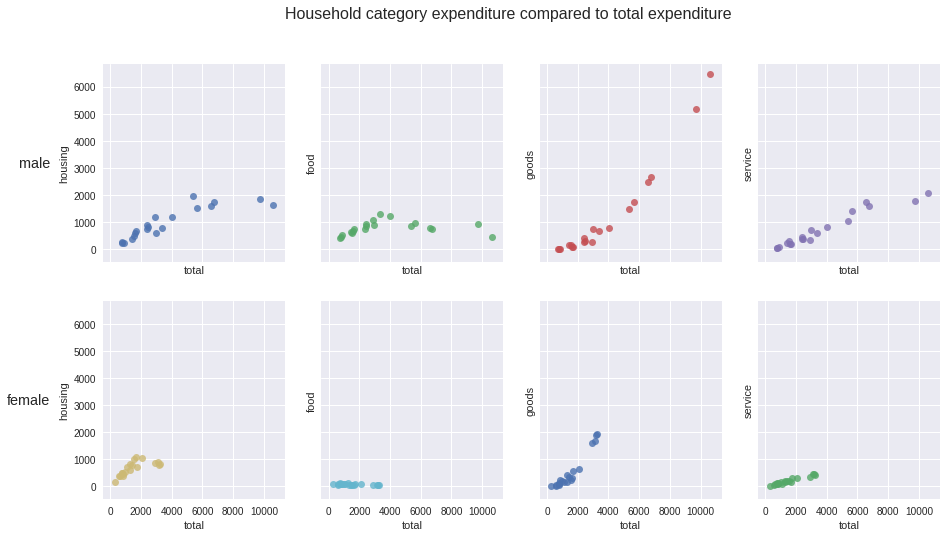

In [150]:
fig, ax = plt.subplots(ncols=4, nrows=2, sharey=True, sharex=True, figsize=(15, 8))
genders = ['male', 'female']

for gid, gender in enumerate(genders):
    for idx, name in enumerate(names):
        sns.regplot(x='total', y=name, data=household[household['gender'] == gender], fit_reg=False, ax=ax[gid][idx])
    ax[gid][0].annotate(gender, xy=(0, 0.5), xytext=(-ax[gid][0].yaxis.labelpad - 5, 0),
                xycoords=ax[gid][0].yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
        
fig.suptitle("Household category expenditure compared to total expenditure", fontsize=16)

### Housing

Females tend to spend about the same on housing as males that total less than 4000.

### Food

Females clearly spend about the same low amount on food compared to their male counterparts.

### Goods

Females tend to spend about the same amount on goods below 2000 total. However, above 2000 total males spend proportionately more.

### Service

Males and females spend about the same below 4000 mark, beyond which males spend a bit more.

## Summary of findings

Females spend visibly less on food despite their total household expenditure, whereas expenditure in housing, goods and service is about the same.

# Ex. 2.2 USStates Sociodemographic Data

With these data

1. Construct a scatterplot matrix of the data labeling the points by state name.
2. Construct a plot of life expectancy and homicide rate conditional on average per capita income.

## Data format

* `Population` population size divided by 1000
* `Income` average per capita income
* `Illiteracy` illiteracy rate (% population)
* `Life.Expectancy` life expectancy (years)
* `Homicide` homicide rate (per 1000)
* `Graduates` percentage of high school graduates
* `Freezing` average number of days per year below freezing

In [151]:
usstates = pd.read_csv("USstates.csv")
usstates.rename(index=str, columns={'Unnamed: 0': 'state'}, inplace=True)
usstates

,state,Population,Income,Illiteracy,Life.Expectancy,Homicide,Graduates,Freezing
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20
1,California,21198,5114,1.1,71.71,10.3,62.6,20
2,Iowa,2861,4628,0.5,72.56,2.3,59.0,140
3,Mississippi,2341,3098,2.4,68.09,12.5,41.0,50
4,New Hampshire,812,4281,0.7,71.23,3.3,57.6,174
5,Ohio,10735,4561,0.8,70.82,7.4,53.2,124
6,Oregon,2284,4660,0.6,72.13,4.2,60.0,44
7,Pennsylvania,11860,4449,1.0,70.43,6.1,50.2,126
8,South Dakota,681,4167,0.5,72.08,1.7,52.3,172
9,Vermont,472,3907,0.6,71.64,5.5,57.1,168


In [152]:
usstates.describe()

,Population,Income,Illiteracy,Life.Expectancy,Homicide,Graduates,Freezing
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,5685.900000,4248.900000,1.030000,70.97400,6.840000,53.430000,103.800000
std,6792.617012,581.021027,0.676675,1.43235,4.489791,7.472475,63.620053
min,472.000000,3098.000000,0.500000,68.09000,1.700000,41.000000,20.000000
25%,1180.000000,3972.000000,0.600000,70.52750,3.525000,50.725000,45.500000
50%,2601.000000,4365.000000,0.750000,71.43500,5.800000,55.150000,125.000000
75%,8955.000000,4611.250000,1.075000,71.98750,9.575000,58.650000,161.000000
max,21198.000000,5114.000000,2.400000,72.56000,15.100000,62.600000,174.000000


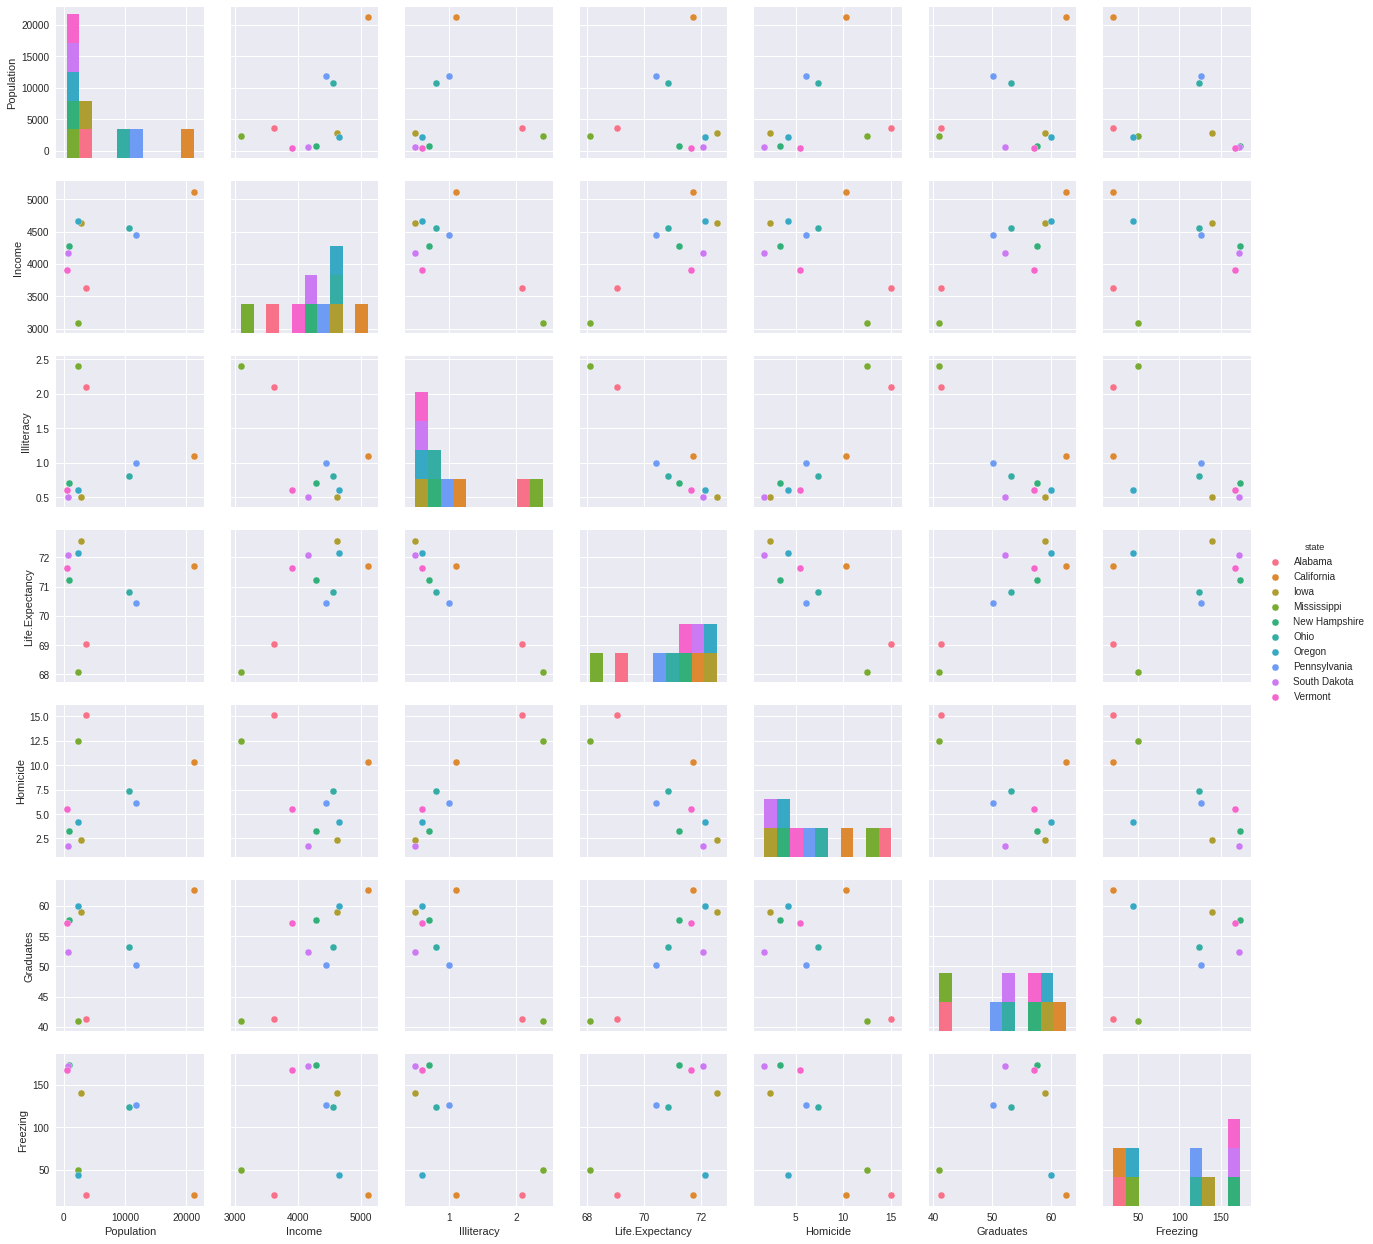

In [153]:
sns.pairplot(hue='state', data=usstates)

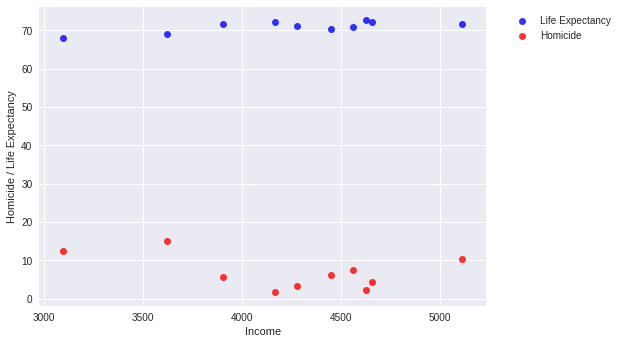

In [154]:
fig, ax = plt.subplots()
sns.regplot(x='Income', y='Life.Expectancy', data=usstates, ax=ax, fit_reg=False, color="blue", label="Life Expectancy")
sns.regplot(x='Income', y='Homicide', data=usstates, ax=ax, fit_reg=False, color="red", label="Homicide")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
ax.set_ylabel("Homicide / Life Expectancy")

# Ex. 2.3 Mortality rates

Construct side-by-side box plots for the data from different age groups and comment on what the graphic tells us about the data.

## Data format

* different age groups


In [155]:
suicides = pd.read_csv('suicides2.csv')
suicides.rename(index=str, columns={'Unnamed: 0': 'country'}, inplace=True)
suicides.head()

,country,A25.34,A35.44,A45.54,A55.64,A65.74
0,Canada,22,27,31,34,24
1,Israel,9,19,10,14,27
2,Japan,22,19,21,31,49
3,Austria,29,40,52,53,69
4,France,16,25,36,47,56


In [168]:
melted_suicides = pd.melt(suicides, id_vars=['country'], value_vars=['A25.34', 'A35.44', 'A45.54', 'A55.64', 'A65.74'])
melted_suicides.head()

,country,variable,value
0,Canada,A25.34,22
1,Israel,A25.34,9
2,Japan,A25.34,22
3,Austria,A25.34,29
4,France,A25.34,16


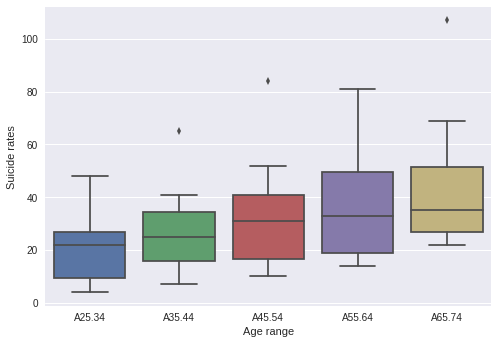

In [169]:
g = sns.boxplot(x="variable", y="value", data=melted_suicides, order=['A25.34', 'A35.44', 'A45.54', 'A55.64', 'A65.74'])
g.set_xlabel("Age range")
g.set_ylabel("Suicide rates")

## Summary of findings

The graph would suggest that median suicide rate increases with age.

# Ex. 2.4 Swiss Banknote Data

Use whatever graphical techniques you think are appropriate to investigate whether there is any _pattern_ or structure in the data. Do you observe something suspicious?

## Data format

* `Length` length of bill, mm
* `Left` width of left edge, mm
* `Right` width of right edge, mm
* `Bottom` bottom margin width, mm
* `Top` top margin width, mm
* `Diagonal` length of image diagonal, mm
* `Y` 0 - genuine, 1 - counterfeit

In [178]:
banknote = pd.read_csv('banknote.csv')
del banknote['Unnamed: 0']
banknote.head()

,Length,Left,Right,Bottom,Top,Diagonal,Y
0,214.8,131.0,131.1,9.0,9.7,141.0,0
1,214.6,129.7,129.7,8.1,9.5,141.7,0
2,214.8,129.7,129.7,8.7,9.6,142.2,0
3,214.8,129.7,129.6,7.5,10.4,142.0,0
4,215.0,129.6,129.7,10.4,7.7,141.8,0


In [167]:
banknote.describe()

,Length,Left,Right,Bottom,Top,Diagonal,Y
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500,0.500000
std,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266,0.501255
min,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000,0.000000
25%,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000,0.000000
50%,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000,0.500000
75%,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000,1.000000
max,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000,1.000000


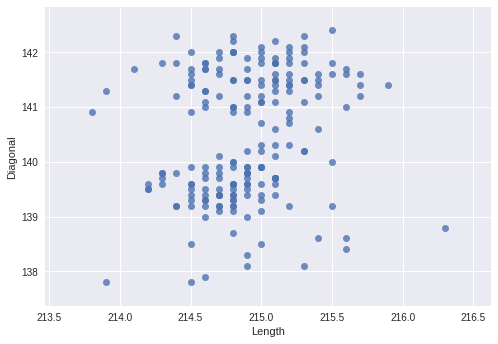

In [191]:
sns.regplot(x="Length", y="Diagonal", data=banknote, fit_reg=False)

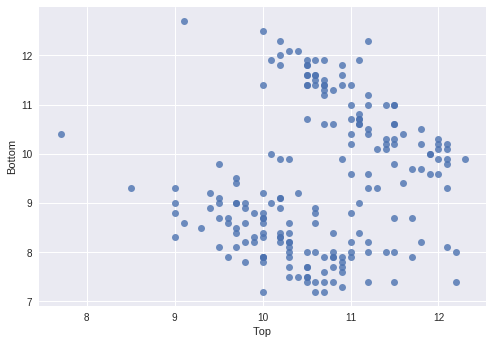

In [192]:
sns.regplot(x="Top", y="Bottom", data=banknote, fit_reg=False)

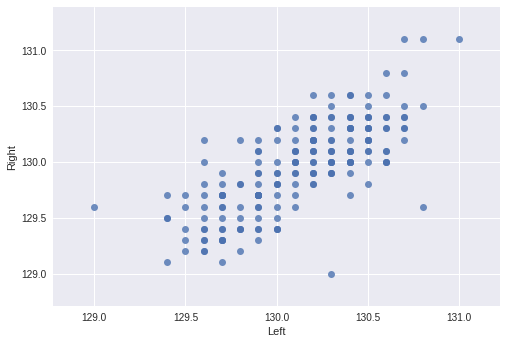

In [199]:
sns.regplot(x="Left", y="Right", data=banknote, fit_reg=False)

The `Top - Bottom` and `Length - Diagonal` graphs would suggest that there are two distinct clusters of bills. Let's check with the parameter `Y`:

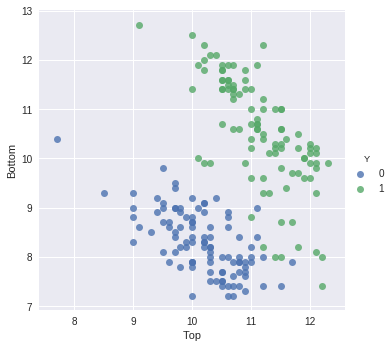

In [200]:
sns.lmplot(x="Top", y="Bottom", hue="Y", data=banknote, fit_reg=False)

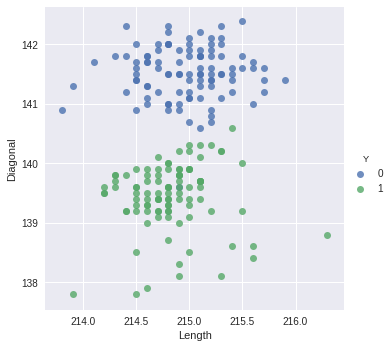

In [201]:
sns.lmplot(x="Length", y="Diagonal", hue="Y", data=banknote, fit_reg=False)

## Summary of findings

There are two distinctly sized clusters of banknotes that can be destinguished by incorrect shape.

# Ex 2.5 Bird Species in Northern Andes

The aim of the study is to investigate how the number of species (`N`) is related to four other variables, `AR` (area of 'island' in thousands of square km), `EL` (elevation in thousands of m), `Dec` (distance from Ecuador in km) and `DNI` (distance to the nearest 'island' in km). Begin by constructing a scatterplot matrix of the data differentiating the islands on each panel by a different plotting symbol and on each diagonal panel showing the histogram of the associated variable. What can you conclude from this plot about how N is related to the other four variables?

In [204]:
birds = pd.read_csv('birds.csv')
birds.rename(
    index=str, 
    columns={
        'Unnamed: 0': 'island',
        'N': 'NumberOfSpecies',
        'AR': 'Area',
        'EL': 'Elevation',
        'Dec': 'DistanceEcuador',
        'DNI': 'DistanceNearestIsland',
    }, 
    inplace=True
)
birds.head()

,island,NumberOfSpecies,Area,Elevation,DistanceEcuador,DistanceNearestIsland
0,Chiles,36,0.33,1.26,36,14
1,LasPapas,30,0.50,1.17,234,13
2,Sumapaz,37,2.03,1.06,543,83
3,Tolima,35,0.99,1.90,551,23
4,Paramillo,11,0.03,0.46,773,45


In [205]:
birds.describe()

,NumberOfSpecies,Area,Elevation,DistanceEcuador,DistanceNearestIsland
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,20.714286,0.655714,1.117143,848.071429,36.785714
std,10.737630,0.778141,0.594092,388.790128,26.086184
min,4.000000,0.030000,0.460000,36.000000,5.000000
25%,13.000000,0.087500,0.670000,606.500000,14.000000
50%,17.500000,0.275000,0.905000,954.000000,32.000000
75%,29.750000,0.895000,1.440000,1141.500000,52.500000
max,37.000000,2.170000,2.280000,1380.000000,83.000000


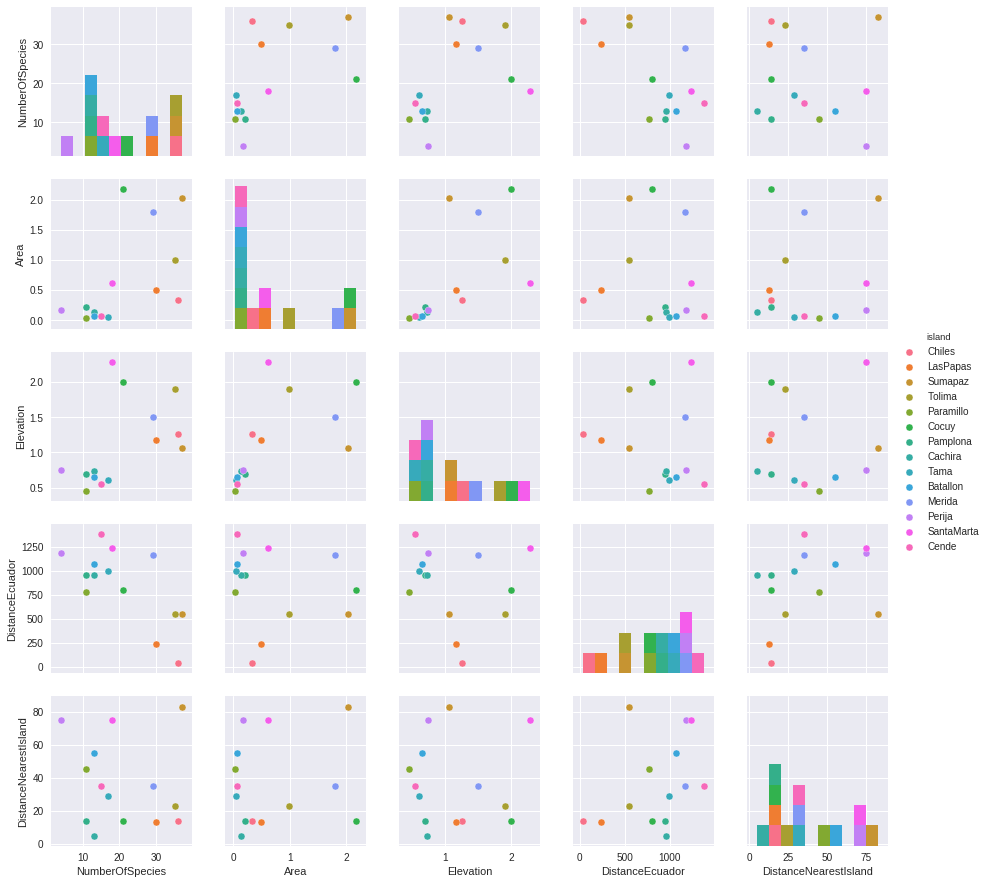

In [206]:
sns.pairplot(hue='island', data=birds)

## Summary of Findings

* Smaller area islands have smaller number of species.
* Lower elevation islands have smaller number of species and higher elevation islands have more.
* Islands further away from Ecuador have small number of species, whereas closer islands have more.
* Distance between nearest islands doesn't seem to affect number of species.